In [1]:
import numpy as np
import itertools

from sys import getsizeof
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [2]:
# built to match the bit breakup in numpy
def base_to_the_n_array(base, num_bases=8):
    return np.array([base**n for n in range(num_bases)])

# starters: binary numbers into base-m space
def binary_to_n_polynomial_powers(bin_num, n_powers):
    return np.array([binary_to_polynomial_power(bin_num, i+2) for i in range(n_powers)])

def binary_to_polynomial_power(bin_val, power_n):
    return val_base_m_to_polynomial_power_n(bin_val, 2, power_n)

# wider approach (values base)
def val_base_m_to_polynomial_power_n(bin_val, base_m, power_n):
    if (bin_val == 0):
        return 0
    return bits_to_polynomial_power(val_in_reverse_base_m(bin_val, base_m), power_n)

def val_in_reverse_base_m(n, base):
    return np.flip(value_to_array_in_base(n, range(base)))

def value_to_array_in_base(n, base): 
    if n == 0: return base[0]
    b = len(base)
    digits = []
    while n > 0:
        digits = [base[n % b]] + digits
        n  = n // b
    return np.array(digits)

def value_to_string_in_base(n, base):
    return np.array2string(value_to_array_in_base(n, range(base)), separator='')[1:-1]

def bits_to_polynomial_power(bits_array, power):
    return np.dot(bits_array, base_to_the_n_array(power, num_bases=np.size(bits_array)))

def prime_filter(a):
    return np.array([n for n in a if is_prime(n)])

def prime_filter_with_indices(a):
    return np.array([(i, n) for i, n in enumerate(a) if is_prime(n)])

def coeff_projection_to_base_n(array, base):
    return np.array([binary_to_polynomial_power(n, base) for n in array])

def coeff_base_m_projection_to_power_n(array, base_m, power_n):
    return np.array([val_base_m_to_polynomial_power_n(n, base_m, power_n) for n in array])

def is_prime(n):
    if (n <= 1) :
        return 0
    if (n <= 3) :
        return 1
    if (n % 2 == 0 or n % 3 == 0) :
        return 0
    i = 5
    while(i * i <= n) :
        if (n % i == 0 or n % (i + 2) == 0):
            return 0
        i = i + 6
    return 1

In [95]:
start_max = 256
num_bases = 256
num_coeffs = 256
indices = np.linspace(0, start_max, start_max+1, dtype=np.int64)

primes = prime_filter(indices[2:])
num_primes = len(primes)
integers = np.linspace(1, num_primes, num_primes+1, dtype=np.int64)

In [96]:
# DO LOOPS AND WRITE FILES

# dimension of array is start_max by num_bases
prime_func = np.vectorize(is_prime)

# PROJECT ALL THE LIKE-COEFFICIENT INTO CONSECUTIVE BASES (INDICES)
bin_polynomial_tower =  np.array([coeff_base_m_projection_to_power_n(indices, 2, i+2) for i in range(num_bases)])
bin_prime_mask = prime_func(bin_polynomial_tower)
bin_prime_tower = bin_prime_mask * bin_polynomial_tower

polynomial_cube = np.array([np.array([coeff_base_m_projection_to_power_n(indices, k+2, i+2) for i in range(num_bases)]) for k in range(num_coeffs)])
prime_cube_mask = prime_func(polynomial_cube)
prime_cube = prime_cube_mask * polynomial_cube
prime_cube_log = np.log2(prime_cube  + (1-bin_prime_mask))

found_primes = np.unique(bin_prime_tower)[1:]
# there should be a version with only the primes...removing whitespace..

np.shape(prime_cube)

KeyboardInterrupt: 

In [ ]:
from matplotlib.colors import LogNorm
import copy

layer = 5


fig = plt.figure(figsize=(12,12))

data = prime_cube[layer]
mask = 1-prime_cube_mask[layer]

ax = sns.heatmap(data + 1-prime_cube_mask[layer], annot=False, cbar=False, mask=mask, norm=LogNorm())
ax.set(xlabel='quantity', ylabel='base')

In [6]:
prime_cube_log = np.log10(prime_cube  + (1-bin_prime_mask))

/Users/johntimothysummers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


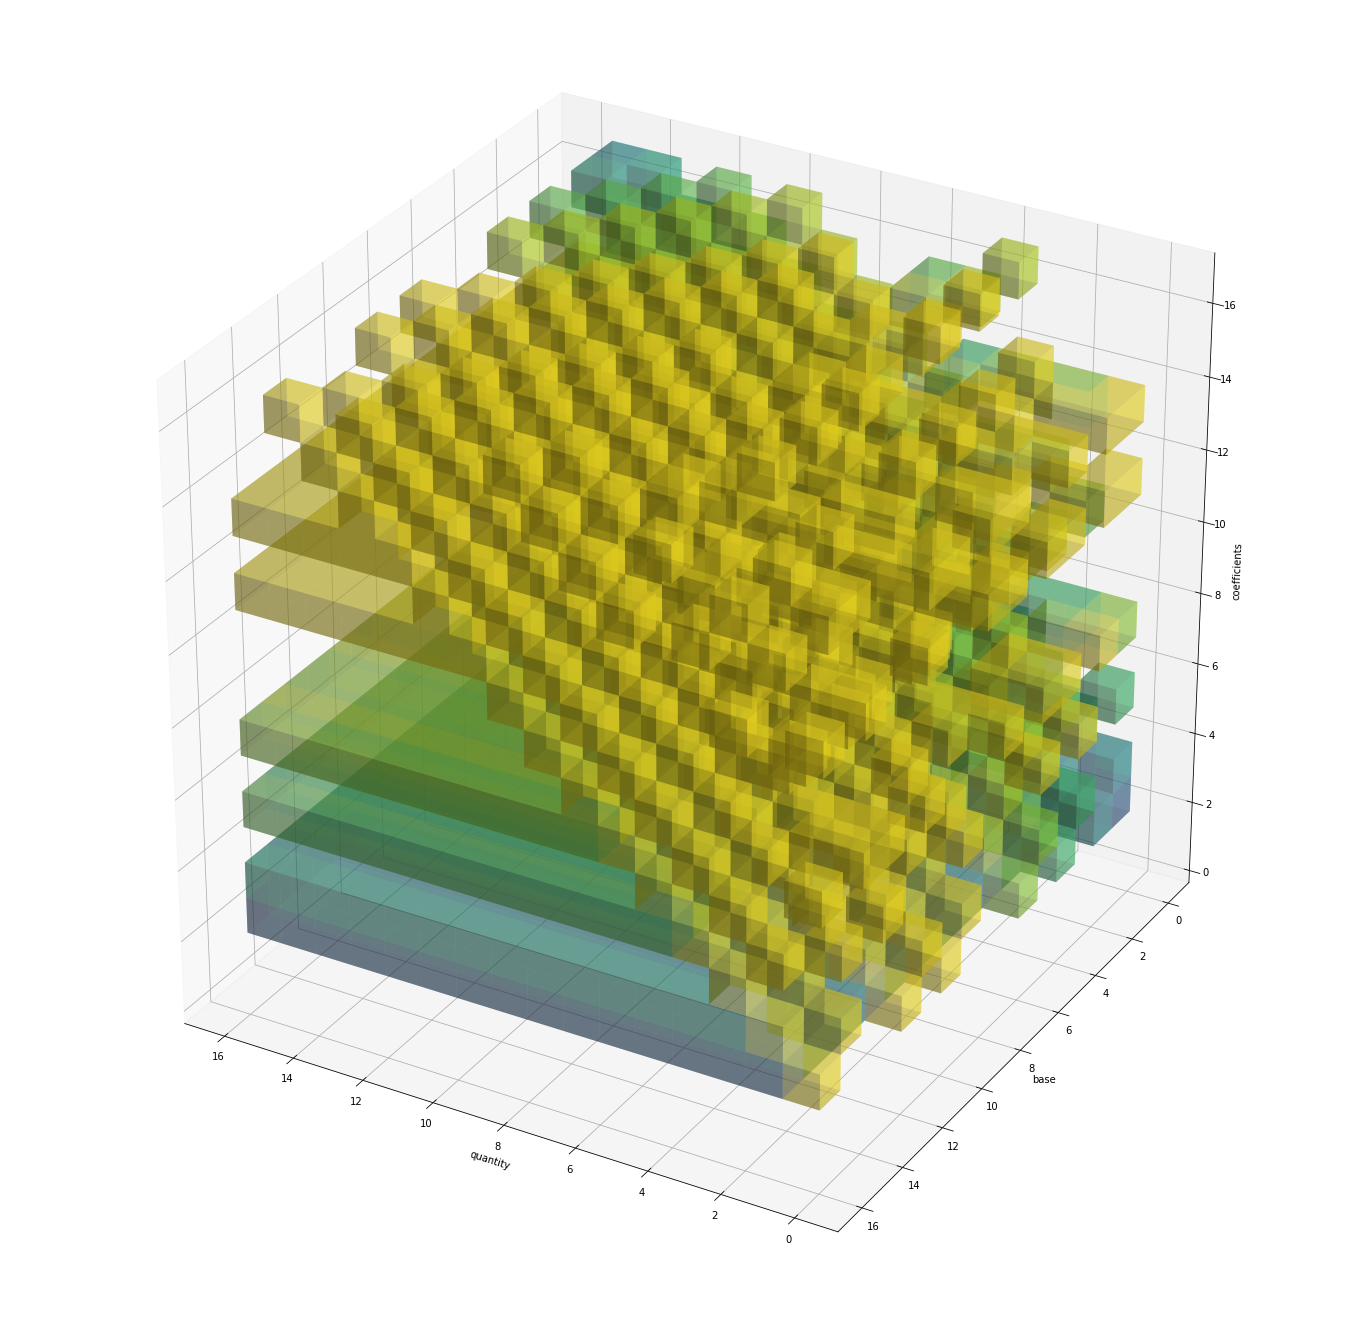

In [7]:
# This import registers the 3D projection, but is otherwise unused.
# and plot everything
fig = plt.figure(figsize=(24,24))
clr = plt.cm.viridis(prime_cube_log)
ax = fig.gca(projection='3d')
ax.view_init(elev=30., azim=120)
ax.voxels(prime_cube, facecolors=clr, alpha=0.4)
ax.set(xlabel='quantity', ylabel='base', zlabel="coefficients")


plt.show()

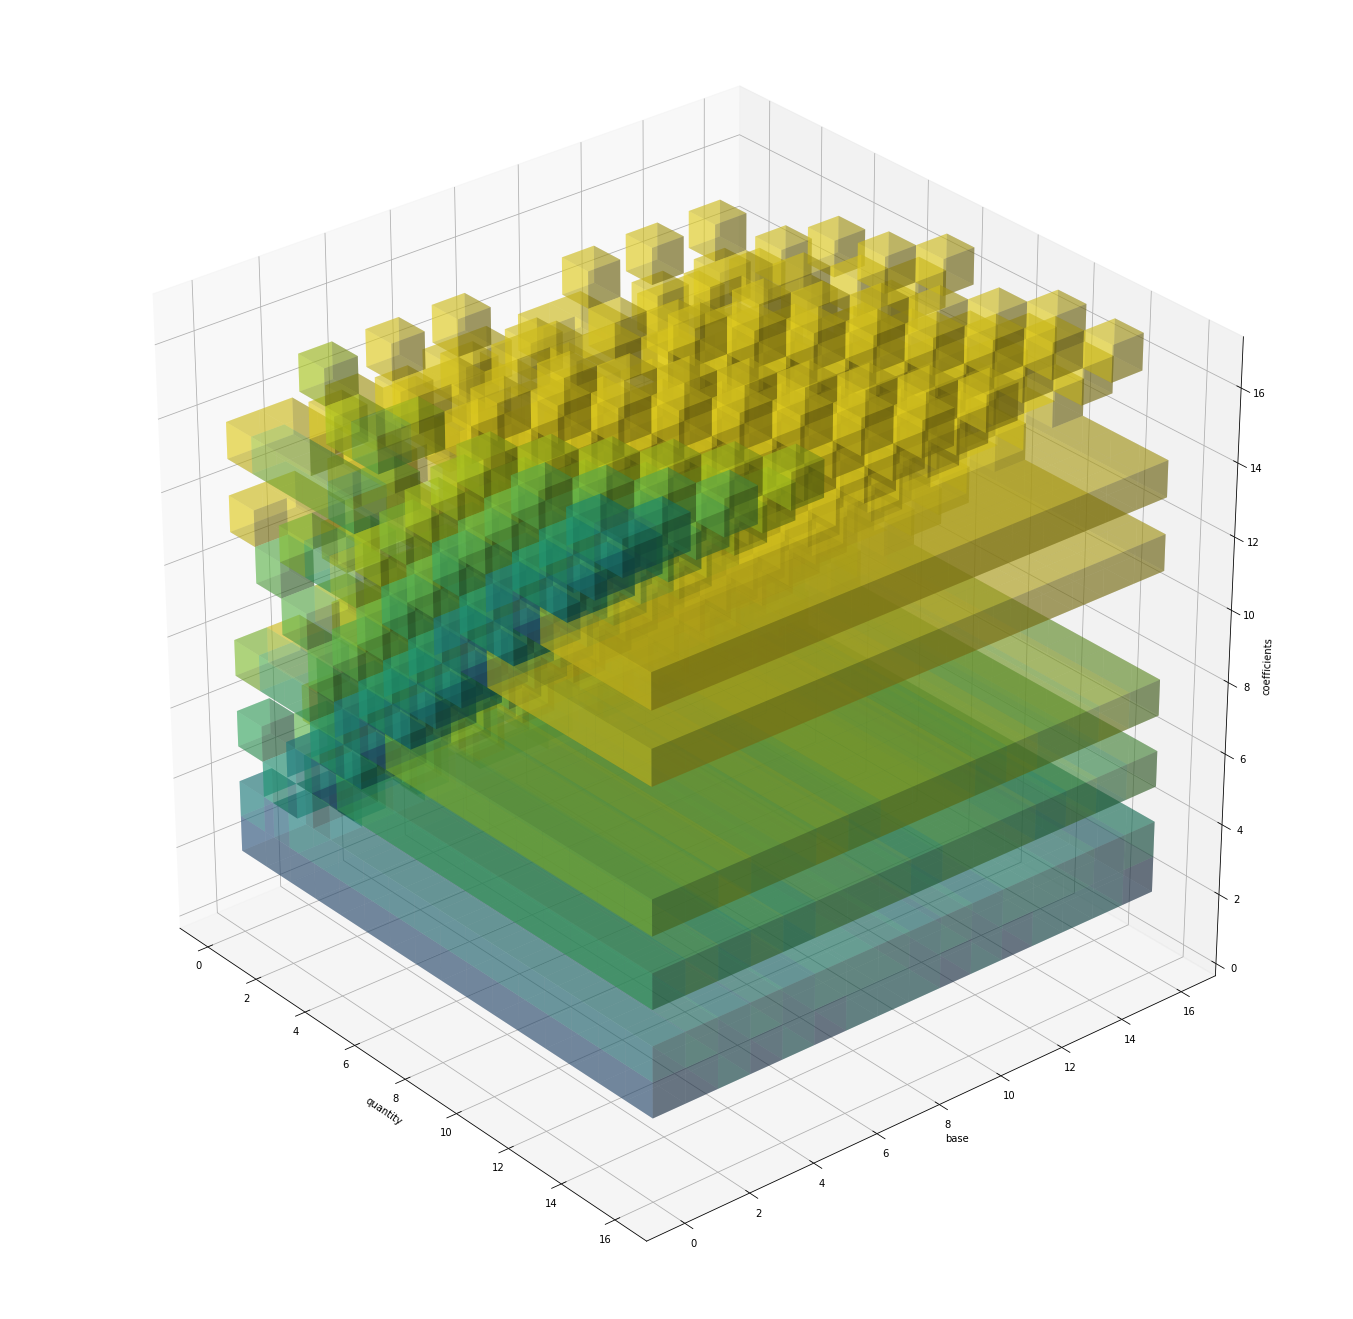

In [8]:
fig = plt.figure(figsize=(24,24))
clr = plt.cm.viridis(prime_cube_log)
ax = fig.gca(projection='3d')
ax.view_init(elev=30., azim=-40)
ax.voxels(prime_cube, facecolors=clr, alpha=0.4)
ax.set(xlabel='quantity', ylabel='base', zlabel="coefficients")


plt.show()

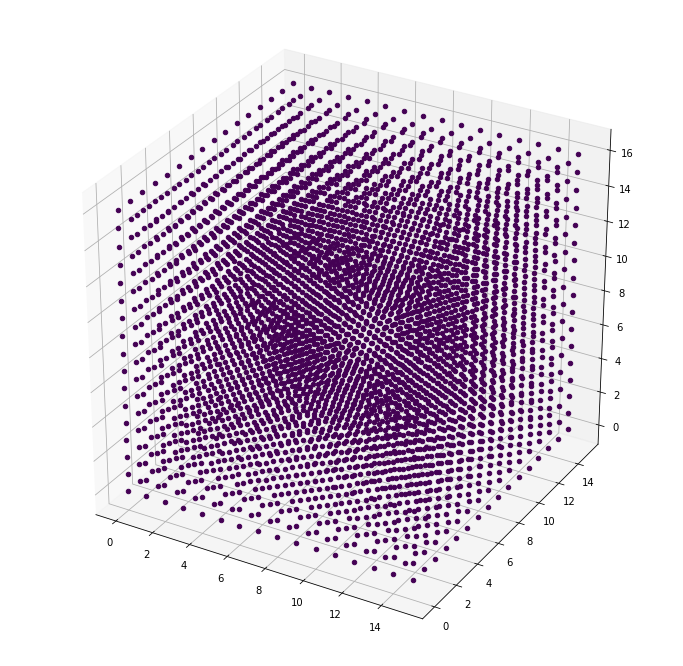

In [90]:
import matplotlib
import random

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

a = range(prime_cube.shape[0])
b = range(prime_cube.shape[1])
c = range(prime_cube.shape[2])

cm = plt.get_cmap("viridis")

# x = np.random.rand(30)
# y = np.random.rand(30)
# z = np.random.rand(30)
# #col = [cm(float(i)/(29)) for i in xrange(29)] # BAD!!!
# col = [cm(float(i)/(30)) for i in range(30)]

values = prime_cube.flatten()

# cmap = cm.cool
# norm = colors.LogNorm(vmin=1, vmax=values.max())
# mapper = cm.ScalarMappable(norm=norm, cmap=cmap)
#norm_values = colors.Normalize(values)
locations = list(itertools.product(a, b, c))

i = 0
for x, y, z in locations:
#     ax.scatter(is_prime(prime_cube[x][y][z])+random.random()*0.01, y, z, c=values[i])
    ax.scatter(x, y, z, cmap=cm, c=[i/len(locations)])
    i += 1



In [81]:
len(values)

4352

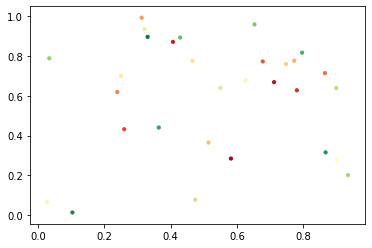

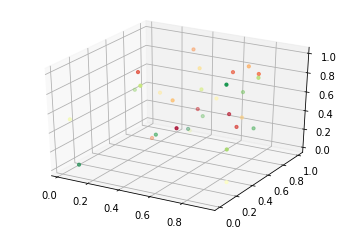

In [54]:
# Create Map
cm = plt.get_cmap("RdYlGn")

x = np.random.rand(30)
y = np.random.rand(30)
z = np.random.rand(30)
#col = [cm(float(i)/(29)) for i in xrange(29)] # BAD!!!
col = [cm(float(i)/(30)) for i in range(30)]

# 2D Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, s=10, c=col, marker='o')  

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.scatter(x, y, z, s=10, c=col, marker='o')  

plt.show()

In [10]:
len(locations)

4352

In [11]:
len(values)

4352